In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

train_images shape: (60000, 28, 28) train_labels shape: (60000,)


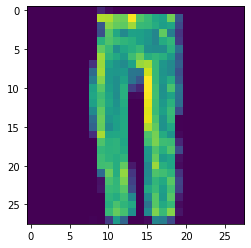

In [2]:
# Show one of the images from the training dataset
img_index = 2020
plt.imshow(train_images[img_index])

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
val_images = train_images[0:10000]
val_labels = train_labels[0:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

In [5]:
val_images = val_images.reshape((val_images.shape[0], 28, 28, 1))
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
val_labels = to_categorical(val_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Build the Model

In [24]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1327360   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [25]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
# train the model
model.fit(train_images,
          train_labels,
          batch_size=64,
          epochs=10,
          validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 56us/sample - loss: 0.1304 - accuracy: 0.9507 - val_loss: 0.2242 - val_accuracy: 0.9272
Epoch 2/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.1281 - accuracy: 0.9516 - val_loss: 0.2293 - val_accuracy: 0.9255
Epoch 3/10
50000/50000 [==============================] - 3s 56us/sample - loss: 0.1251 - accuracy: 0.9524 - val_loss: 0.2206 - val_accuracy: 0.9262
Epoch 4/10
50000/50000 [==============================] - 5s 99us/sample - loss: 0.1259 - accuracy: 0.9520 - val_loss: 0.2291 - val_accuracy: 0.9266
Epoch 5/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.1247 - accuracy: 0.9525 - val_loss: 0.2281 - val_accuracy: 0.9287
Epoch 6/10
50000/50000 [==============================] - 3s 54us/sample - loss: 0.1200 - accuracy: 0.9546 - val_loss: 0.2235 - val_accuracy: 0.9276
Epoch 7/10
50000/50000 [==============================] 

In [29]:
score = model.evaluate(test_images, test_labels, verbose=0)

In [30]:
print(score[1])

0.9284
